## Introduction to Data Science and Machine Learning,

In [ ]:
 #can place all the imports at the beginning
import numpy as np

np.random.seed(1)  # for reproducibility

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
(X_train, y_train),(X_test, y_test) = mnist.load_data()

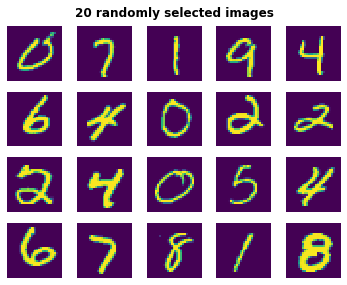

In [ ]:
from matplotlib import pyplot as plt
from PIL import Image
import random

plt.close('all')
plt.style.use("ggplot")

# get list of randomly selected images and create their labels as top probabilities
def get_random_images(images, subset_indices=None, n_images=10, probs=None, n_probs=None):
  if subset_indices is None: # if no subset_indices provided, then use all
      subset_indices = range(0,len(images))
  selected_indices = random.choices(subset_indices, k=n_images)

  imgs = []
  labels = []
  for imgidx in selected_indices:
    img = images[imgidx]
    if img.max()<=1.0: 
      img = img*255
    if np.ndim(img)==3 and img.shape[2]==1:
      img = np.reshape(img,(img.shape[0],img.shape[1]))
    img = Image.fromarray(img)
    imgs.append(img)

    if (probs is not None) and (n_probs is not None):
      top_probs = np.argsort(probs, axis=1)[:,:-(n_probs+1):-1]
      label_prob = ""
      for i in range(n_probs):
        label_prob += f"{top_probs[imgidx,i]} ({probs[imgidx,top_probs[imgidx,i]]:.3f}) "
      
      labels.append(label_prob)

  return imgs, labels

# plots images with labels
def show_images(ims, figsize=(12,6), rows=1, interp=False, titles=None, suptitle=None):
    if type(ims[0]) is np.ndarray:
        ims = np.array(ims).astype(np.uint8)
      #  if (ims.shape[-1] != 3):
     #       ims = ims.transpose((0,2,3,1))
    f = plt.figure(figsize=figsize)
    cols = len(ims)//rows if len(ims) % 2 == 0 else len(ims)//rows + 1
    for i in range(len(ims)):
        sp = f.add_subplot(rows, cols, i+1)
        sp.axis('Off')
        if titles is not None:
            sp.set_title(titles[i])
        plt.imshow(ims[i], interpolation=None if interp else 'none')
    if suptitle:
      f.suptitle(suptitle,fontweight="bold")

    f.tight_layout(rect=[0, 0, 1, 0.95])

# display randomly selected images
n_images = 20

imgs, labels = get_random_images(X_test/255, n_images=n_images)

  #Rotatet 360 degree
for i in range(len(imgs)):
  imgs[i] = np.rot90(np.rot90(np.rot90(np.rot90(imgs[i], axes=(0,1)), axes=(0,1)), axes=(0,1)), axes=(0,1))
show_images(imgs, figsize=(5,4), rows=4, suptitle=str(n_images) + " randomly selected images")

In [ ]:
# Reshaping input image
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert to float and normalize
#This is a grayscale image with possible pixel 
#intensity values from 0-255. To make the pixel 
#intensity values within the range 0-1, we’ll divide the intensity values of all pixels by 255. 
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')
X_train /= 255
X_test /= 255

In [ ]:
# Convert 1-dimensional class arrays to one-hot encodings (class matrices)
y_train = tf.keras.utils.to_categorical(y_train, 10)
y_test = tf.keras.utils.to_categorical(y_test, 10)

In [ ]:
from tensorflow.keras import Input
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense, Convolution2D, MaxPooling2D, Dropout
from tensorflow.keras.optimizers import SGD
# define layers
def define_model():
  model = Sequential()
  model.add(Convolution2D(8,(5,5), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))
  model.add(MaxPooling2D(pool_size=(3, 3),strides=(1,1)))
  model.add(Convolution2D(16, (5,5), strides=(2,2), padding='valid', activation='relu'))
  model.add(MaxPooling2D(pool_size=(3, 3) ,strides=(2,2)))
  model.add(Flatten())
  model.add(Dense(10, activation='softmax'))

  # compile the model
  opt = SGD(lr=0.01, momentum=0.9)
  model.compile(optimizer=opt,
 loss='categorical_crossentropy',
 metrics=['accuracy'])

  return model

model = define_model()
model.summary()


Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_4 (Conv2D)           (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 22, 22, 8)        0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 9, 9, 16)          3216      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 4, 4, 16)         0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 256)               0         
                                                                 
 dense_2 (Dense)             (None, 10)               

/usr/local/lib/python3.8/dist-packages/keras/optimizers/optimizer_v2/gradient_descent.py:108: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(SGD, self).__init__(name, **kwargs)


**Results**

Over the course of 10 epochs, the data is separated into the training data for the 25% and 75% portions and the validating set. The active change in results (being loss, validation loss, accuracy, and validation accuracy) are displayed by a line graph and output messages. The final results for loss and accuracy are 0.0395 and 0.9883 respectively. 

In [ ]:
hist = []
for i in range (4):
  tmp =[]
  for j in range(len(X_train)):
      tmp.append(np.rot90(X_train[j], axes=(0,1)))
  np.concatenate((X_train, np.array(tmp)))
hist.append(model.fit(X_train, y_train, validation_split=0.25, epochs=10))

Epoch 1/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.2280 - accuracy: 0.9255 - val_loss: 0.0759 - val_accuracy: 0.9763
Epoch 2/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0742 - accuracy: 0.9763 - val_loss: 0.0774 - val_accuracy: 0.9759
Epoch 3/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0588 - accuracy: 0.9820 - val_loss: 0.0576 - val_accuracy: 0.9822
Epoch 4/10
1407/1407 [==============================] - 5s 4ms/step - loss: 0.0482 - accuracy: 0.9856 - val_loss: 0.0608 - val_accuracy: 0.9817
Epoch 5/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0455 - accuracy: 0.9859 - val_loss: 0.0501 - val_accuracy: 0.9848
Epoch 6/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0406 - accuracy: 0.9871 - val_loss: 0.0621 - val_accuracy: 0.9813
Epoch 7/10
1407/1407 [==============================] - 6s 4ms/step - loss: 0.0386 - accuracy: 0.9878 - val_loss: 0.0548 - val_accuracy:

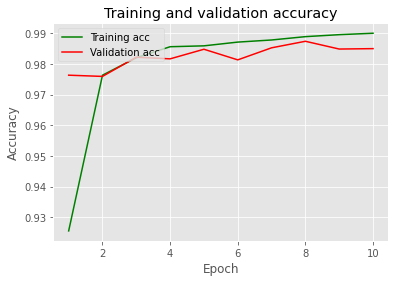

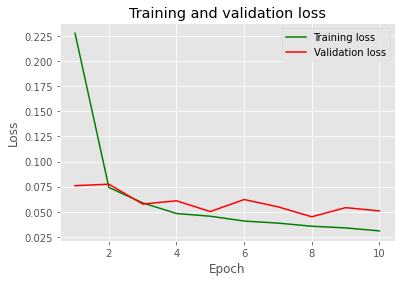

In [ ]:
def plot_curves(hist):
  acc = hist.history['accuracy']
  val_acc = hist.history['val_accuracy']
  loss = hist.history['loss']
  val_loss = hist.history['val_loss']

  epochs = range(1, len(acc) + 1)

  # accuracy plots
  plt.plot(epochs, acc, 'g', label='Training acc')
  plt.plot(epochs, val_acc, 'r', label='Validation acc')
  plt.title('Training and validation accuracy')
  plt.xlabel('Epoch')
  plt.ylabel('Accuracy')
  plt.legend(loc='upper left')

  # los plots
  plt.figure()
  plt.plot(epochs, loss, 'g', label='Training loss')
  plt.plot(epochs, val_loss, 'r', label='Validation loss')
  plt.title('Training and validation loss')
  plt.xlabel('Epoch')
  plt.ylabel('Loss')
  plt.legend(loc='upper right')

  plt.show()
for h in hist:
  plot_curves(h)

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)

# score contains the metrics passed in the compile method. Here: loss, accuracy, and precision
print(model.metrics_names)
print(score)

['loss', 'accuracy']
[0.039675816893577576, 0.9868000149726868]


In [ ]:
import numpy as np

prob = model.predict(X_test)
pred = np.argmax(prob, axis = 1)
label = np.argmax(y_test,axis = 1) 

correct_indices = np.flatnonzero(pred == label) 
incorrect_indices = np.flatnonzero(pred != label) 
print(len(correct_indices)," classified correctly") 
print(len(incorrect_indices)," classified incorrectly")

313/313 [==============================] - 1s 2ms/step
9868  classified correctly
132  classified incorrectly


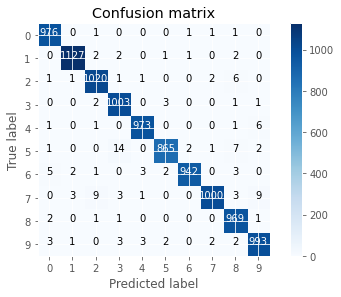

In [ ]:
import itertools
def plot_confusion_matrix(cm, classes,
                        normalize=False,
                        title='Confusion matrix',
                        cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
            horizontalalignment="center",
            color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()

    plt.ylabel('True label')
    plt.xlabel('Predicted label')

conf_mat = tf.math.confusion_matrix(labels=label, predictions=pred).numpy()
#plot_confusion_matrix(conf_mat,[0,1,2,3,4,5,6,7,8,9])
plot_confusion_matrix(conf_mat,[0,1,2,3,4,5,6,7,8,9])

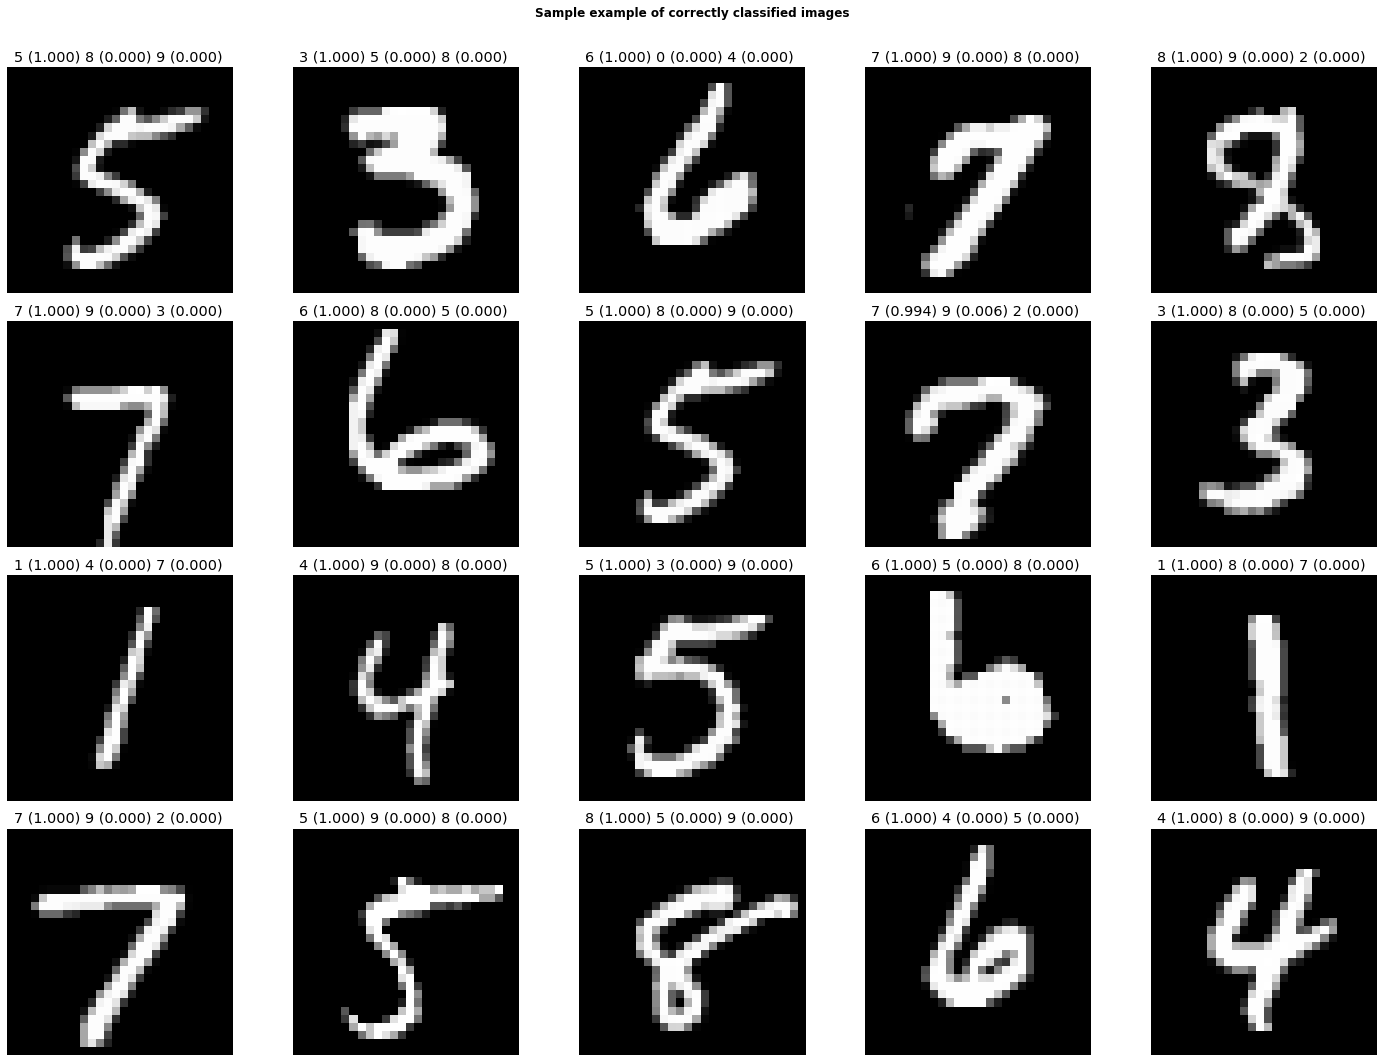

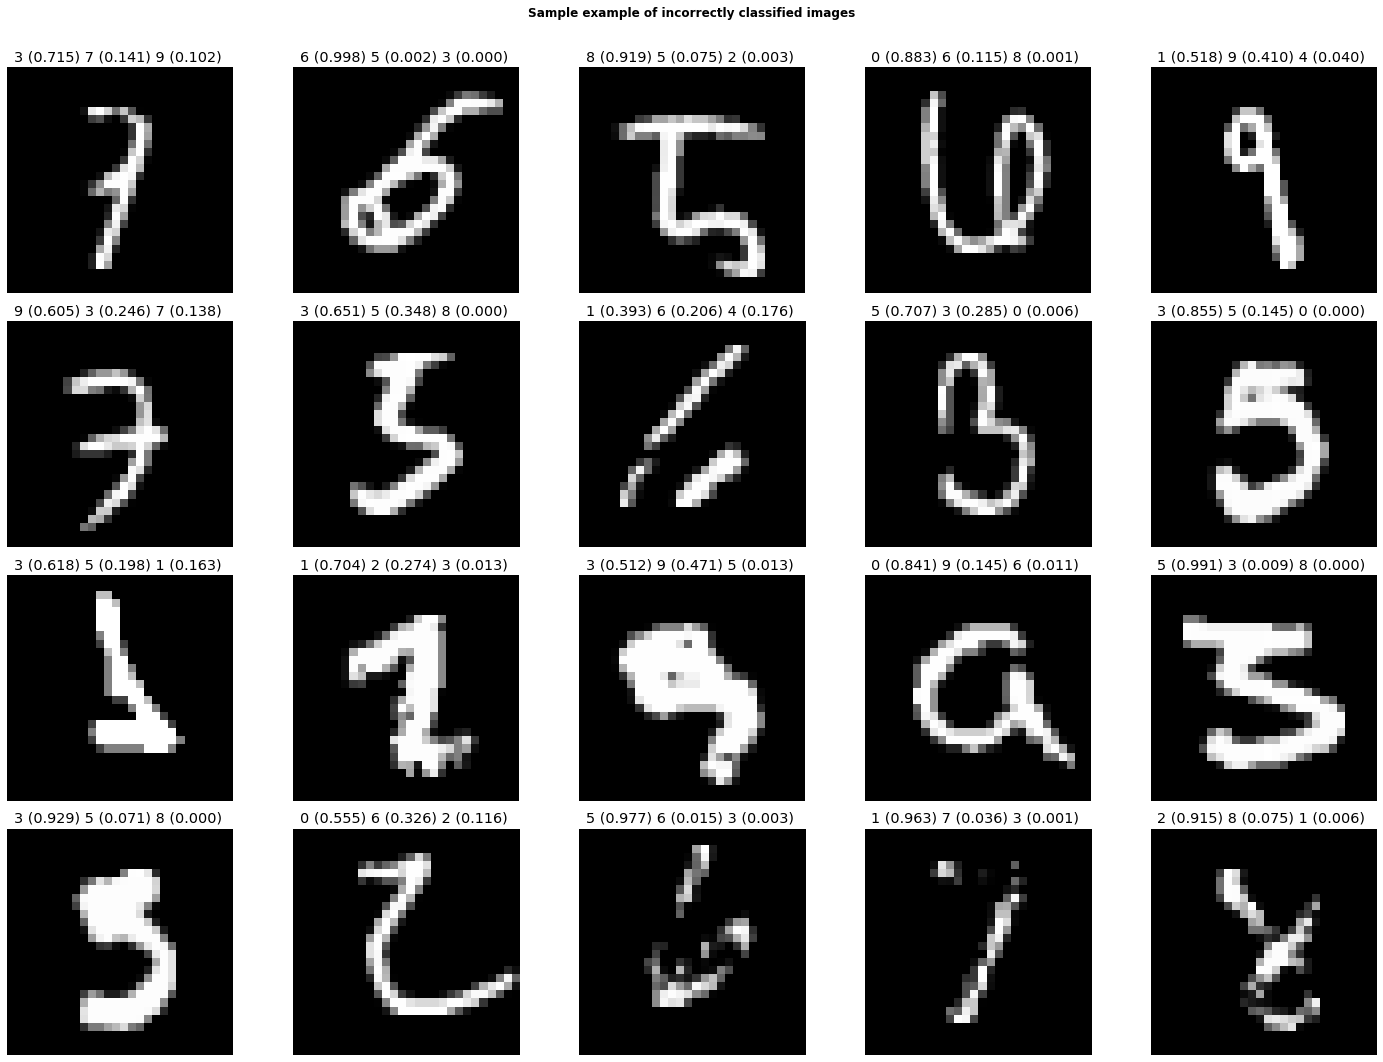

In [ ]:
## display randomly selected images with top three probabilities
n_images_toshow = 20
n_probs_toshow = 3

# show correctly classified images
imgs, labels = get_random_images(X_test, correct_indices, n_images_toshow,
                                  prob,n_probs_toshow)
show_images(imgs, figsize=(20,15), rows=4, titles=labels,
            suptitle="Sample example of correctly classified images")

# show incorrectly classified images
imgs, labels = get_random_images(X_test, incorrect_indices, n_images_toshow,
                                 prob ,n_probs_toshow)
show_images(imgs, figsize=(20,15), rows=4, titles=labels,
            suptitle="Sample example of incorrectly classified images")